In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
file_list = []
for dirpath, _, filenames in os.walk('../data/LiverCT'):
    for filename in filenames:
        file_list.append(os.path.join(dirpath, filename))
file_list

['../data/LiverCT/volume_pt5/volume-41.nii',
 '../data/LiverCT/volume_pt5/volume-46.nii',
 '../data/LiverCT/volume_pt5/volume-48.nii',
 '../data/LiverCT/volume_pt5/volume-47.nii',
 '../data/LiverCT/volume_pt5/volume-43.nii',
 '../data/LiverCT/volume_pt5/volume-45.nii',
 '../data/LiverCT/volume_pt5/volume-44.nii',
 '../data/LiverCT/volume_pt5/volume-50.nii',
 '../data/LiverCT/volume_pt5/volume-49.nii',
 '../data/LiverCT/volume_pt5/volume-42.nii',
 '../data/LiverCT/segmentations/segmentation-5.nii',
 '../data/LiverCT/segmentations/segmentation-56.nii',
 '../data/LiverCT/segmentations/segmentation-84.nii',
 '../data/LiverCT/segmentations/segmentation-120.nii',
 '../data/LiverCT/segmentations/segmentation-11.nii',
 '../data/LiverCT/segmentations/segmentation-117.nii',
 '../data/LiverCT/segmentations/segmentation-103.nii',
 '../data/LiverCT/segmentations/segmentation-65.nii',
 '../data/LiverCT/segmentations/segmentation-9.nii',
 '../data/LiverCT/segmentations/segmentation-8.nii',
 '../data/

In [3]:
def load_nii_as_array(filepath):
    ct_scan = nib.load(filepath).get_fdata()
    array = np.array(ct_scan, dtype=np.float32)
    return np.rot90(array)

sample = 0
sample_ct = load_nii_as_array(f'../data/LiverCT/volume_pt1/volume-{sample}.nii')
sample_ct_mask = load_nii_as_array(f'../data/LiverCT/segmentations/segmentation-{sample}.nii')
print(sample_ct.shape)
print(sample_ct_mask.shape)
print(sample_ct.dtype)

(512, 512, 75)
(512, 512, 75)
float32


In [4]:
sample_ct.min(), sample_ct.max(), sample_ct_mask.min(), sample_ct_mask.max()

(-3024.0, 1410.0, 0.0, 2.0)

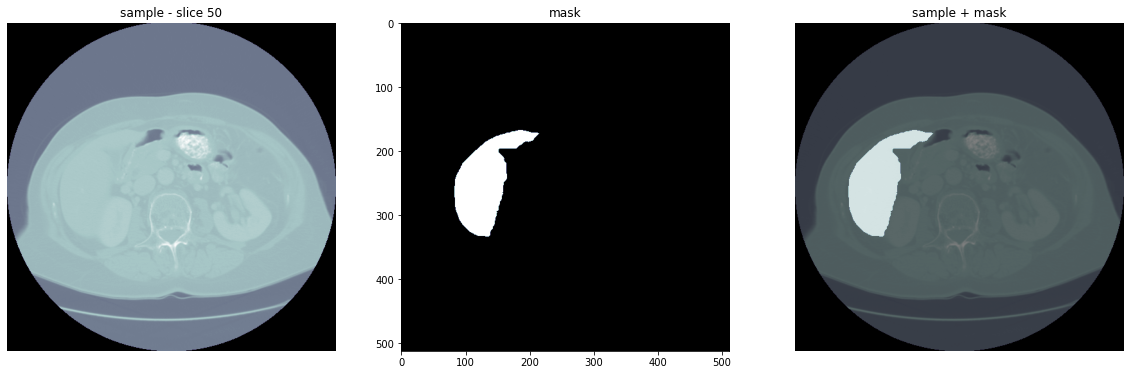

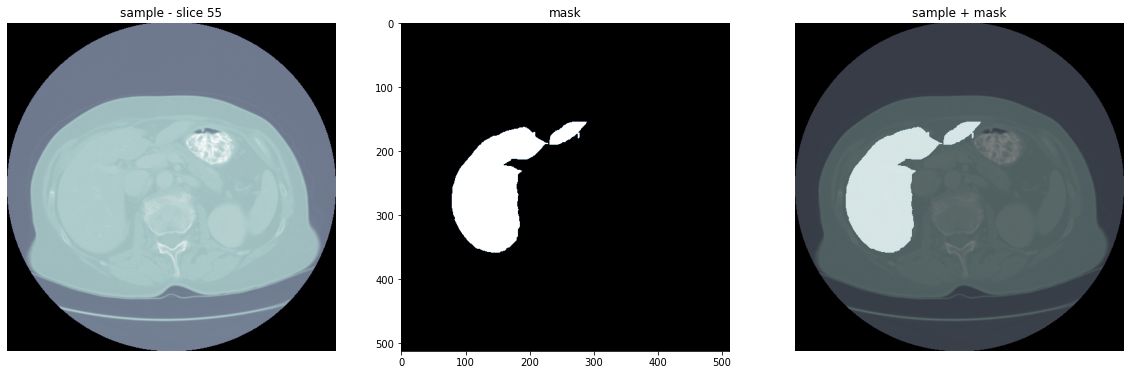

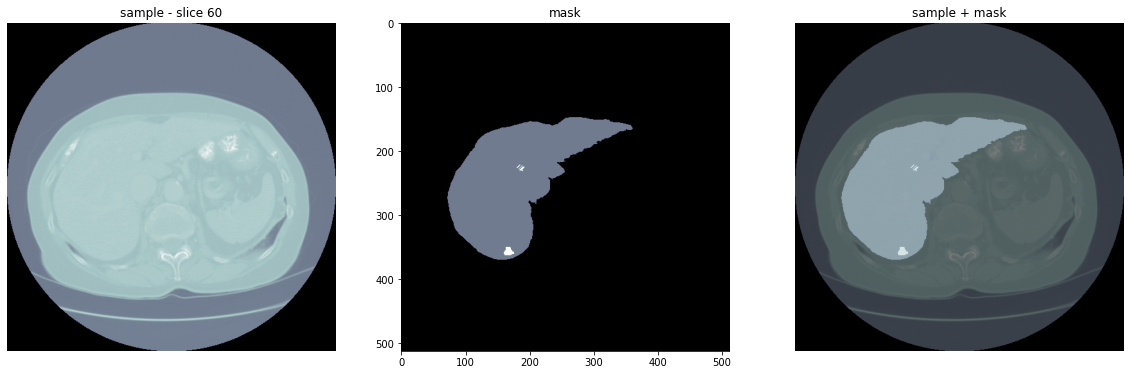

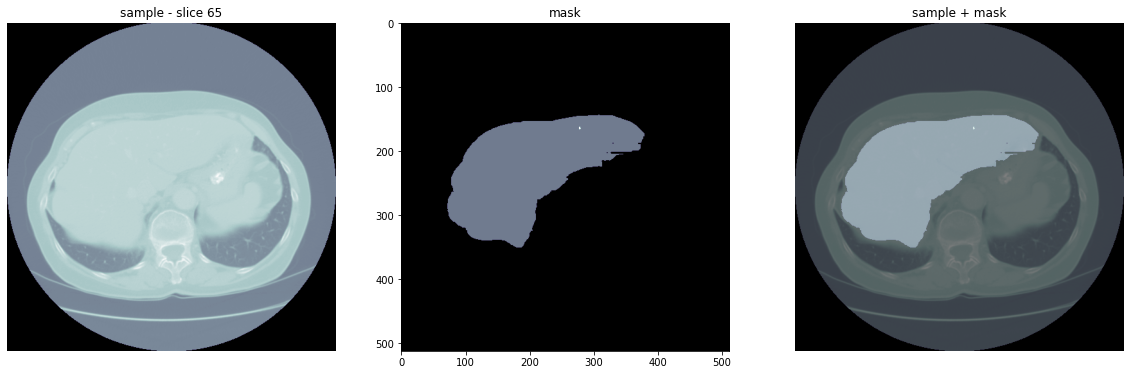

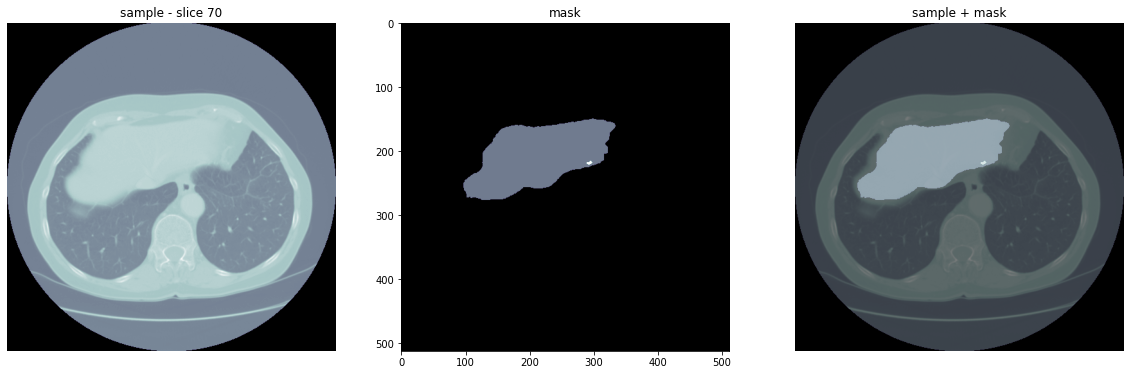

In [62]:
def vis_sample(slice, cmap=plt.cm.bone):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))

    ax1.imshow(sample_ct[..., slice], cmap=cmap)
    ax1.set_title(f'sample - slice {slice}')
    ax1.axis('off')

    ax2.imshow(sample_ct_mask[..., slice], cmap=cmap)
    ax2.set_title('mask')
    ax1.axis('off')

    ax3.imshow(sample_ct[..., slice], cmap=plt.cm.bone)
    ax3.imshow(sample_ct_mask[..., slice], alpha=0.5, cmap=cmap)
    ax3.set_title('sample + mask')
    ax3.axis('off')

for s in range(50, 75, 5):
    vis_sample(s)